#    **Titanic : A Complete Tutorial For Beginners**

In this kernel, I am going to use Logistic Regression to predict whether the passengers are survived or not.

**Please, upvote if you find useful !!**


**Steps**

*     what is classification?
*     what is Logistic Regression?
*     imports
*     Handling missing values
*     Data visualization
*     removing outliers
*     One Hot Encoding
*     Feature Scaling
*     Submission

**Let us learn, how to deal with a classification problem.**


**What is Classification?**


When the target is categorical (with 2 or more classes), then we use Classification technique.


In Titanic dataset, the target is "Survived" variable with class 0 and class 1. 
class 0 indicates "not survived" and class 1 indicates "survived".



**What is Logistic Regression?**


Logistic Regression is used for classification problems. Logistic Regression is named for the     
function used at the core of the method, the Logistic function. The logistic function is also known 
as the Sigmoid function. 
It is an S-shaped curve.

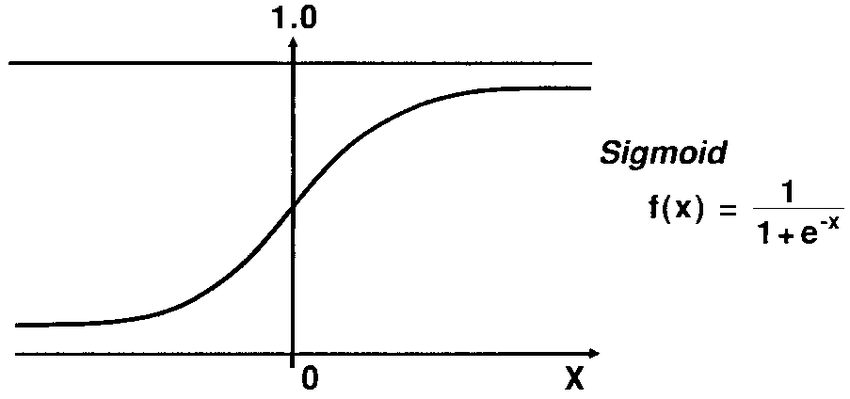

check out below links for Logistic Regression in depth.

https://youtu.be/L_xBe7MbPwk

https://youtu.be/uFfsSgQgerw


Import the libraries and modules.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

Now import train data and test data.

In [ ]:
train_df= pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

Lets make copies of train_df and test_df.

In [ ]:
train = train_df.copy()
test= test_df.copy()

To know the information of the dataset, we use info() function. It gives information about variables, number of non-null count, datatype of each columns and memory usage.

In [ ]:
print(train.info())

In [ ]:

print(test.info())


describe() function gives statistical details of the dataset.

In [ ]:
print(train.describe())

In [ ]:

print(test.describe())


Lets check the null values in the dataset.

In [ ]:
print(train.isnull().sum())


In [ ]:
print(test.isnull().sum())

There are null values in train dataset and test dataset.


In [ ]:
print(train.columns)


In [ ]:
print(test.columns)

Lets remove the variables which are not significant in this data.

In [ ]:
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace= True)


Fill the null values with mean, median or mode according to the requirements.

In [ ]:
train['Age'].median()


In [ ]:
train['Embarked'].mode()[0]

In [ ]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [ ]:
print(train.isnull().sum())


There are no null values in train dataset


In [ ]:
test['Age'].median()


In [ ]:
test['Fare'].median()

In [ ]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [ ]:
print(test.isnull().sum())


 There are no null values in test dataset

value_counts() gives count of unique values.

In [ ]:
train['Survived'].value_counts()


In [ ]:
train['Pclass'].value_counts()


In [ ]:
train['Sex'].value_counts()


In [ ]:
train['SibSp'].value_counts()


In [ ]:
train['Parch'].value_counts()


In [ ]:
train['Embarked'].value_counts()

In [ ]:
test['Pclass'].value_counts()


In [ ]:
test['Sex'].value_counts()



In [ ]:
test['SibSp'].value_counts()


In [ ]:
test['Parch'].value_counts()


In [ ]:
test['Embarked'].value_counts()

Lets do Data Visualization for train dataset and test dataset

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data= train)

From the above figure, we can observe that survived people are less compared to not-survived people.

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data= train)

males are more compared to females

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data= train)

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Pclass', data= train)

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y= 'Age', hue='Sex', data= train)

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y= 'Fare', data= train)

Fare is high in Pclass 1 compared to Pclass 2 and Pclass 3

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data= test)

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y= 'Fare', data= test)

Check outliers in the data

In [ ]:

train.plot(kind='box', figsize= (10,8))


There are outliers in Age, SibSp, Parch and Fare variables. I am using clip() funtion to remove the outliers. Parch variable is removed because more than 75% of the values are 0.

In [ ]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']

train[cols]= train[cols].clip(lower= train[cols].quantile(0.15), upper= train[cols].quantile(0.85), axis=1)

train.drop(columns=['Parch'], axis=1, inplace=True)

In [ ]:
train.plot(kind='box', figsize= (10,8)) 


There are no outliers in the train dataset

In [ ]:
test.plot(kind='box', figsize= (10,8))


There are outliers in Age, SibSp, Parch and Fare variables. clip() funtion is used to remove the outliers. Parch variable is removed because more than 75% of the values are 0.

In [ ]:
test[cols]= test[cols].clip(lower= test[cols].quantile(0.15), upper= test[cols].quantile(0.85), axis=1)

test.drop(columns=['Parch'], axis=1, inplace=True)

In [ ]:
test.plot(kind='box', figsize= (10,8))  


There are no outliers in the test dataset

One Hot Encoding is used to convert categorical data into numerical data.


In [ ]:

train= pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

test= pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

In [ ]:
train.head()

In [ ]:
test.head()

Now, lets split the data.

In [ ]:
X_train= train.iloc[:, 1:]
y_train= train['Survived'].values.reshape(-1,1)

X_test= test

Feature Scaling is used to standardize the independent variables present in the data in a fixed range.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [ ]:
features= ['Age', 'SibSp', 'Fare']

X_train[features]= ss.fit_transform(X_train[features])
X_test[features]= ss.fit_transform(X_test[features])

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()

clf.fit(X_train, y_train.ravel())

predictions= clf.predict(X_test)

In [ ]:
print(clf.score(X_train, y_train))


In [ ]:
submission= pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': predictions })

print(submission.head())

In [ ]:
filename= 'titanic predictions.csv'
submission.to_csv(filename, index=False)

 **If you enjoy this notebook, please share and give an upvote. Any suggestions or comments are appreciated. Happy Learning :)**